# Data Analysis
This notebook is meant for exploritory analysis and in depth analysis of data on reddit users. Note: comments are not studied in this notebook because they are not central to the research (outside of determining pagerank) and they take a very long time to load.

## Setup

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [36]:
# Configurable constants
subreddit = "enlightenedbirdmen"
download_date_string = "19.12.04-14:27:14"

data_directory = "data/"

# Derived constants
submissions_file = data_directory + subreddit + "-augmented-submissions-" + download_date_string + ".csv"
users_file = data_directory + subreddit + "-users-" + download_date_string + ".csv"

## Read Data

In [37]:
submissions = pd.read_csv(submissions_file, index_col=0)
submissions.head()

,index,submission_id,user,utc,score,title,body,subreddit,date,content,word_p_dist,entropy,novelty,transience,novelty_5,transience_5,impact,impact_5
0,956,94drrz,NaN,1.533333e+09,11,What if i told you,That I was a lizard man. I hate the mudmen to...,enlightenedbirdmen,2018-08-03 21:47:39,That I was a lizard man. I hate the mudmen to...,"{'That': 0.0625, 'I': 0.125, 'was': 0.0625, 'a...",3.875000,NaN,8.234497,NaN,9.030909,NaN,NaN
1,955,94eoi7,EyeSisLeader,1.533340e+09,2,NEW UPDATE. I AM A SPY TRYING TO GET INFO FROM...,NaN,enlightenedbirdmen,2018-08-03 23:50:24,NEW UPDATE. I AM A SPY TRYING TO GET INFO FROM...,"{'NEW': 0.058823529411764705, 'UPDATE.': 0.058...",4.087463,8.570377,9.189900,NaN,8.938168,-0.619523,NaN
2,954,94kj6d,Lafayette_is_daddy,1.533401e+09,251,The WEAK should fear the STRONG,NaN,enlightenedbirdmen,2018-08-04 16:50:35,The WEAK should fear the STRONG,"{'The': 0.16666666666666666, 'WEAK': 0.1666666...",2.584963,10.667387,10.681525,NaN,10.681729,-0.014138,NaN
3,953,94pp04,bukbukbagok,1.533448e+09,360,THE GRACE AND BEAUTY IS OVERWHELMING MY BIRD B...,NaN,enlightenedbirdmen,2018-08-05 05:38:55,THE GRACE AND BEAUTY IS OVERWHELMING MY BIRD B...,"{'THE': 0.1, 'GRACE': 0.1, 'AND': 0.1, 'BEAUTY...",3.321928,9.953967,7.904631,NaN,9.174662,2.049336,NaN
4,952,94yyrk,Cthulhu_3mpir3,1.533537e+09,18,"SKEEEEEEEEEEE, WE MUST DEFEND THE HILLTOP IN T...",NaN,enlightenedbirdmen,2018-08-06 06:35:13,"SKEEEEEEEEEEE, WE MUST DEFEND THE HILLTOP IN T...","{'SKEEEEEEEEEEE,': 0.058823529411764705, 'WE':...",3.616875,6.726948,9.661822,NaN,9.225181,-2.934874,NaN


In [38]:
# a version of submissions without nan or infinite values
safe_submissions = submissions \
    .drop('body', axis=1) \
    .replace(np.inf, np.nan) \
    .replace(-np.inf, np.nan) \
    .dropna()

In [39]:
users = pd.read_csv(users_file, index_col=0)
users.head()

,num_posts,max_score_submissions,mean_score_submissions,min_score_submissions,mean_length_submissions,mean_impact,mean_novelty,mean_transience,mean_impact_5,mean_novelty_5,mean_transience_5,num_comments,max_score_comments,mean_score_comments,min_score_comments,mean_length_comments,pagerank
user,,,,,,,,,,,,,,,,,
-PatrickBateman,1.0,345.0,345.000000,345.0,38.000000,0.000038,11.263539,11.263501,0.006940,11.270629,11.263689,NaN,NaN,NaN,NaN,NaN,0.000505
-Tell-Me-Your-Story-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,5.0,5.0,195.0,0.000263
-ruy,1.0,54.0,54.000000,54.0,40.000000,0.066434,10.463612,10.397179,0.018555,10.464141,10.445586,NaN,NaN,NaN,NaN,NaN,0.000376
00dawn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,13.0,13.0,13.0,20.0,0.000263
0pipis,3.0,423.0,142.666667,2.0,49.666667,0.782967,10.253509,9.470542,0.145551,10.234422,10.088871,NaN,NaN,NaN,NaN,NaN,0.000600


In [40]:
# a last minute adjustment
users['ln_pagerank'] = users['pagerank'].apply(np.log)
users['ln_num_posts'] = users['num_posts'].apply(np.log)
users['ln_mean_length_submissions'] = users['mean_length_submissions'].apply(np.log)
users['ln_mean_score_submissions'] = users['mean_score_submissions'].apply(np.log)

In [41]:
# a version of users without nans (removes a lot of comment info)
safe_users = users \
    .drop('num_comments', axis=1) \
    .drop('max_score_comments', axis=1) \
    .drop('mean_score_comments', axis=1) \
    .drop('min_score_comments', axis=1) \
    .drop('mean_length_comments', axis=1) \
    .dropna()
safe_users = safe_users[np.isfinite(safe_users).all(1)] # drop infinites as well

## Exploritory Data Analysis
Lets get a feel for the data

### Exploring Submissions

#### Simple Histograms

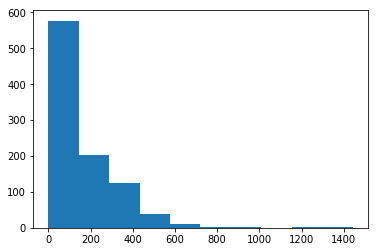

In [42]:
plt.hist(submissions['score'])
plt.show()

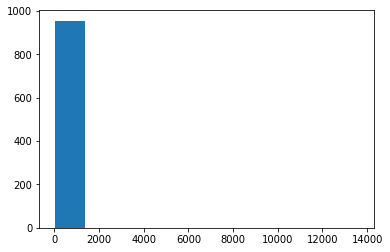

In [43]:
plt.hist(submissions['content'].apply(len))
plt.show()

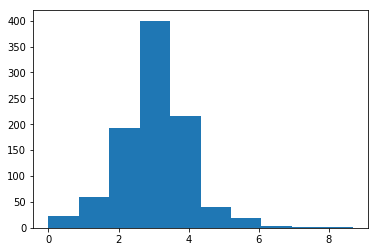

In [44]:
plt.hist(submissions['entropy'])
plt.show()

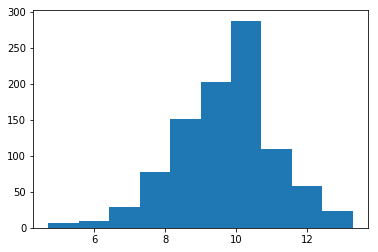

In [45]:
plt.hist(submissions['novelty'])
plt.show()

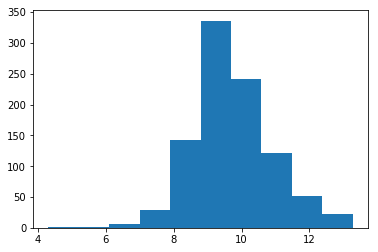

In [46]:
plt.hist(submissions['novelty_5'])
plt.show()

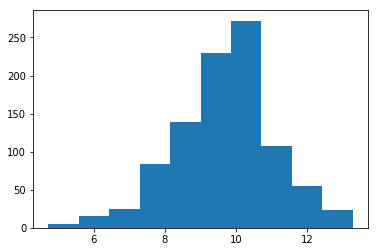

In [47]:
plt.hist(submissions['transience'])
plt.show()

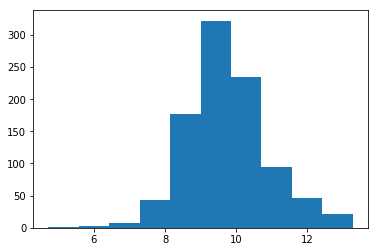

In [48]:
plt.hist(submissions['transience_5'])
plt.show()

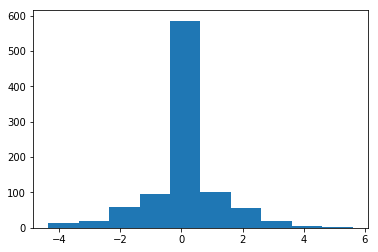

In [49]:
plt.hist(submissions['impact'])
plt.show()

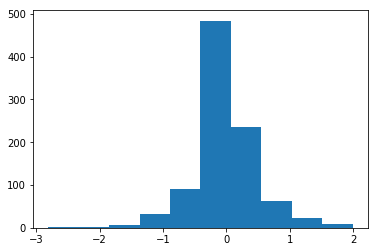

In [50]:
plt.hist(submissions['impact_5'])
plt.show()

#### Submission Scatterplots

slope: -0.019329611938418912
intercept: 141.05895461719834
r: -0.055605952404397085
r-squared: 0.003092021942800074
standard error: 0.01191877060643086


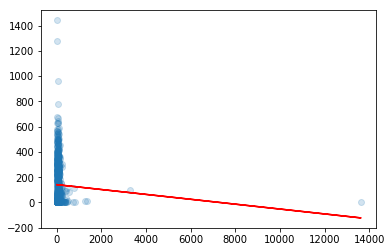

In [51]:
# scatterplot
x = safe_submissions['content'].apply(len)
y = safe_submissions['score']
plt.scatter(x, y, alpha=0.2)

# best fit line
m, b, r, p, std_err = stats.linregress(x, y)
print("slope: " + str(m))
print("intercept: " + str(b))
print("r: " + str(r))
print("r-squared: " + str(r**2))
print("standard error: " + str(std_err))
plt.plot(x, b + m * x, color="red")

plt.show()

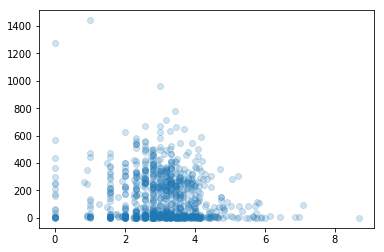

In [52]:
plt.scatter(x=submissions['entropy'], y=submissions['score'], alpha=0.2)

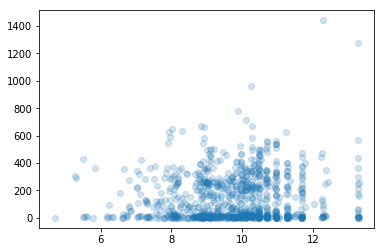

In [53]:
plt.scatter(x=submissions['novelty'], y=submissions['score'], alpha=0.2)
plt.show()

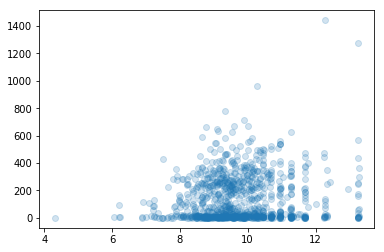

In [54]:
plt.scatter(x=submissions['novelty_5'], y=submissions['score'], alpha=0.2)
plt.show()

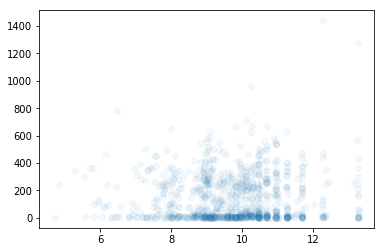

In [55]:
plt.scatter(x=submissions['transience'], y=submissions['score'], alpha=0.05)
plt.show()

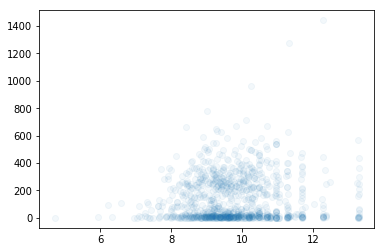

In [56]:
plt.scatter(x=submissions['transience_5'], y=submissions['score'], alpha=0.05)
plt.show()

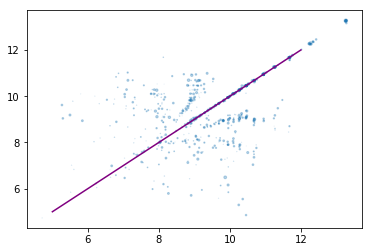

In [57]:
# novelty-transcience plot
plt.scatter(x=submissions['novelty'], y=submissions['transience'], s=submissions['score'] / 100, alpha=0.3)

# add line of equality
domain = np.arange(5, 13)
plt.plot(domain, domain, color='purple')

plt.show()

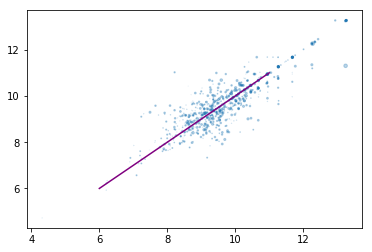

In [58]:
# novelty-transcience plot
plt.scatter(x=submissions['novelty_5'], y=submissions['transience_5'], s=submissions['score'] / 100, alpha=0.3)

# add line of equality
domain = np.arange(6, 12)
plt.plot(domain, domain, color='purple')

plt.show()

slope: 8.244583579457952
intercept: 139.02194013281053
r: 0.054082774432856986
r-squared: 0.0029249464903552892
standard error: 5.227279971943543


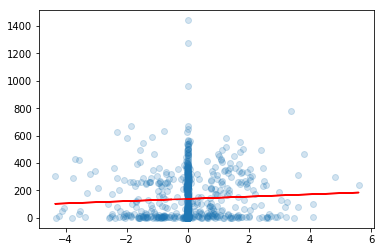

In [59]:
# scatterplot
x = safe_submissions['impact']
y = safe_submissions['score']
plt.scatter(x, y, alpha=0.2)

# best fit line
m, b, r, p, std_err = stats.linregress(x, y)
print("slope: " + str(m))
print("intercept: " + str(b))
print("r: " + str(r))
print("r-squared: " + str(r**2))
print("standard error: " + str(std_err))
plt.plot(x, b + m * x, color="red")

plt.show()

slope: 13.4244206212514
intercept: 139.0469399396826
r: 0.03780581567597471
r-squared: 0.0014292796989257754
standard error: 12.185081165397479


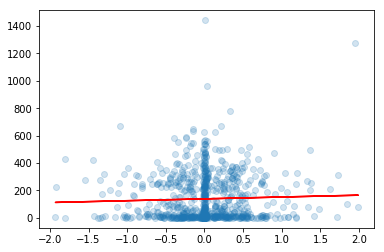

In [60]:
# scatterplot
x = safe_submissions['impact_5']
y = safe_submissions['score']
plt.scatter(x, y, alpha=0.2)

# best fit line
m, b, r, p, std_err = stats.linregress(x, y)
print("slope: " + str(m))
print("intercept: " + str(b))
print("r: " + str(r))
print("r-squared: " + str(r**2))
print("standard error: " + str(std_err))
plt.plot(x, b + m * x, color="red")

plt.show()

### Exploring Users

#### Simple Histograms

In [61]:
# helper to make this less redundant
def user_hist(column_name):
    plt.hist(users[column_name])
    plt.title("users " + column_name)
    plt.show()

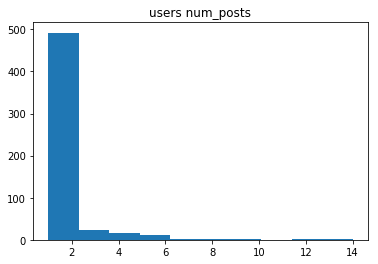

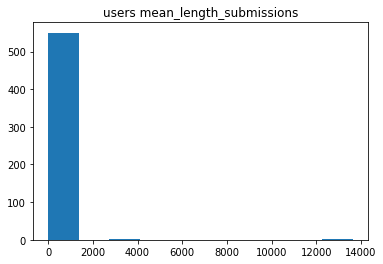

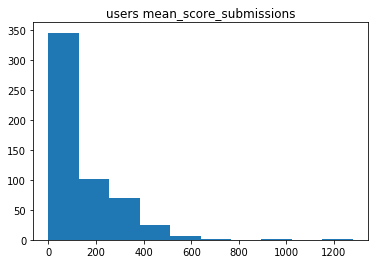

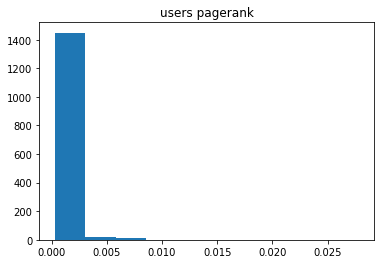

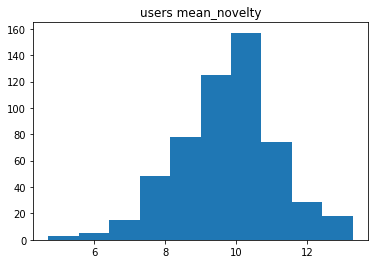

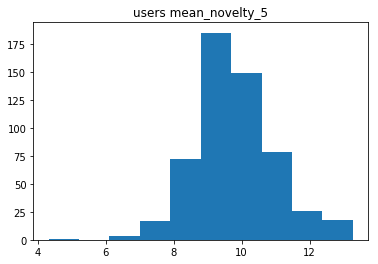

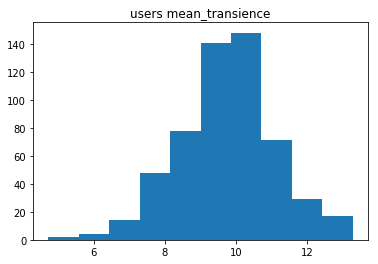

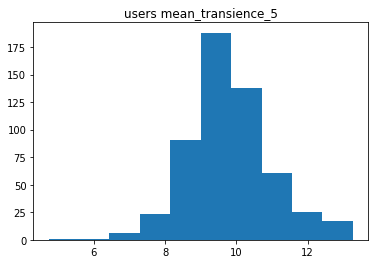

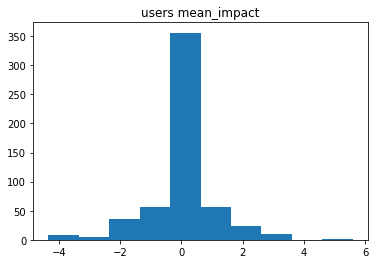

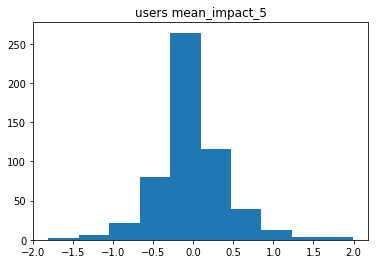

In [62]:
user_hist('num_posts')
user_hist('mean_length_submissions')
user_hist('mean_score_submissions')
user_hist('pagerank')
user_hist('mean_novelty')
user_hist('mean_novelty_5')
user_hist('mean_transience')
user_hist('mean_transience_5')
user_hist('mean_impact')
user_hist('mean_impact_5')

#### User Scatterplots

In [63]:
# a scatterplot and regression helper function
def user_scatter(x_col, y_col, alpha=0.2):
    x = safe_users[x_col]
    y = safe_users[y_col]
    
    # scatterplot
    plt.scatter(x, y, alpha=alpha)

    # best fit line
    m, b, r, p, std_err = stats.linregress(x, y)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("slope: " + str(m))
    print("intercept: " + str(b))
    print("r: " + str(r))
    print("r-squared: " + str(r**2))
    print("p: " + str(p))
    print("standard error: " + str(std_err))
    plt.plot(x, b + m * x, color="red")
    plt.title("users " + y_col + " vs " + x_col)

    plt.show()

In [64]:
safe_users.columns

Index(['num_posts', 'max_score_submissions', 'mean_score_submissions',
       'min_score_submissions', 'mean_length_submissions', 'mean_impact',
       'mean_novelty', 'mean_transience', 'mean_impact_5', 'mean_novelty_5',
       'mean_transience_5', 'pagerank', 'ln_pagerank', 'ln_num_posts',
       'ln_mean_length_submissions', 'ln_mean_score_submissions'],
      dtype='object')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.0006927309828901123
intercept: 0.00017963217566735338
r: 0.47601042290720486
r-squared: 0.22658592271629602
p: 1.7070212199353866e-31
standard error: 5.554013431216885e-05


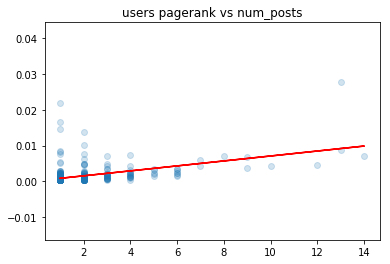

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 2.8331679662419985e-06
intercept: 0.0008988245021460093
r: 0.1934347621338499
r-squared: 0.037417007201779096
p: 6.864311931505895e-06
standard error: 6.236050600817507e-07


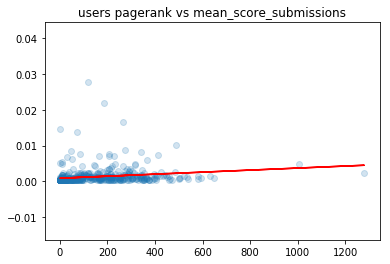

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -8.253502855340139e-08
intercept: 0.0012778693824233973
r: -0.022265209561786577
r-squared: 0.0004957395568302724
p: 0.6080289381516542
standard error: 1.608261194567212e-07


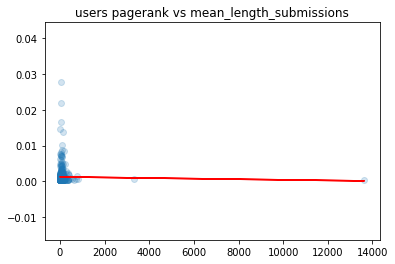

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 7.53397427895275e-05
intercept: 0.0005326446930236636
r: 0.046670828016062905
r-squared: 0.0021781661877049224
p: 0.2821347253895809
standard error: 6.997741057965468e-05


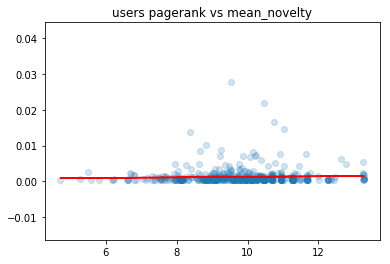

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 5.359968581244301e-05
intercept: 0.0007428312248961943
r: 0.028284772206618417
r-squared: 0.0008000283387802937
p: 0.5146579843200871
standard error: 8.220315844166735e-05


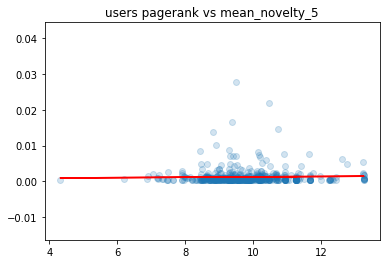

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 6.660358149241584e-05
intercept: 0.0006176466739566967
r: 0.03985765726829898
r-squared: 0.0015886328429171863
p: 0.3584146823703178
standard error: 7.24591629521451e-05


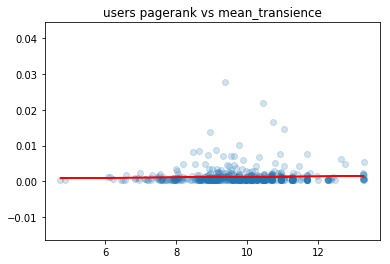

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 6.017037627141999e-05
intercept: 0.0006785939833307667
r: 0.030955354449904465
r-squared: 0.0009582339691192202
p: 0.4757511317384474
standard error: 8.431241088160522e-05


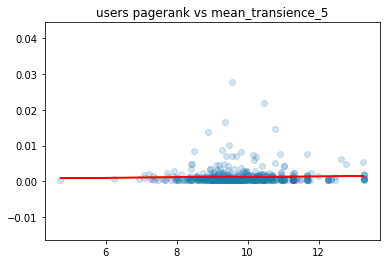

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 2.2577429677524444e-05
intercept: 0.0012688912102745515
r: 0.0105123045480699
r-squared: 0.00011050854691137111
p: 0.8086776517530085
standard error: 9.319772380191726e-05


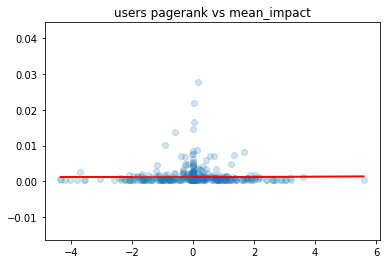

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -2.080198229568281e-05
intercept: 0.0012688730228781152
r: -0.004108828516308853
r-squared: 1.6882471776432806e-05
p: 0.9246028699726452
standard error: 0.00021970289504033227


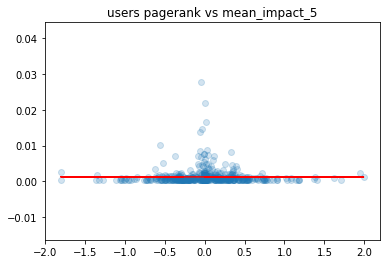

In [65]:
user_scatter('num_posts', 'pagerank')
user_scatter('mean_score_submissions', 'pagerank')
user_scatter('mean_length_submissions', 'pagerank')
user_scatter('mean_novelty', 'pagerank')
user_scatter('mean_novelty_5', 'pagerank')
user_scatter('mean_transience', 'pagerank')
user_scatter('mean_transience_5', 'pagerank')
user_scatter('mean_impact', 'pagerank')
user_scatter('mean_impact_5', 'pagerank')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.9346221037084593
intercept: -7.466616208813691
r: 0.5222455452676509
r-squared: 0.272740409551906
p: 1.2523281921855695e-38
standard error: 0.0662306125359836


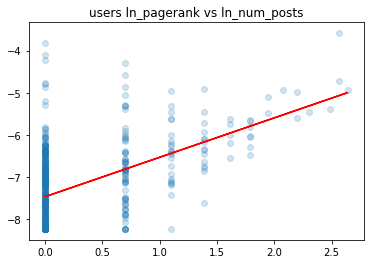

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.2736807306809152
intercept: -8.275827946681032
r: 0.5143372451955691
r-squared: 0.264542801795367
p: 2.492839137024827e-37
standard error: 0.01980284951237815


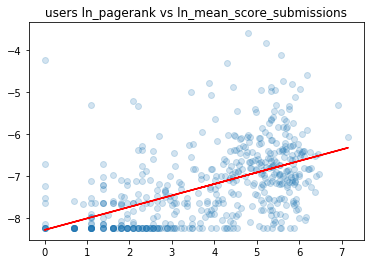

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.004230615996621752
intercept: -7.245405921723828
r: 0.0036001569251865122
r-squared: 1.2961129885968402e-05
p: 0.933914189180617
standard error: 0.05099552894046742


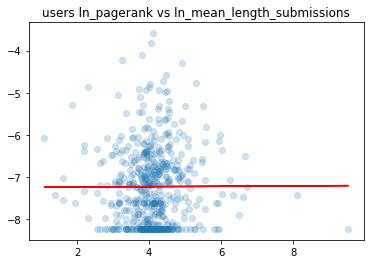

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.042121758003658485
intercept: -7.639671085793579
r: 0.0636225346898378
r-squared: 0.004047826920359615
p: 0.14240918918575912
standard error: 0.028672628169000906


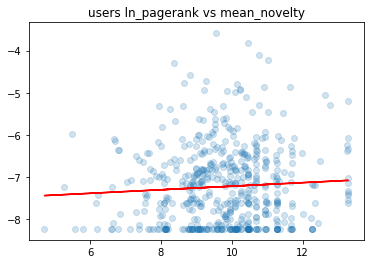

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.039842975591846734
intercept: -7.619062679945486
r: 0.051265513576614984
r-squared: 0.0026281528822740953
p: 0.23738246196548637
standard error: 0.03368276574838169


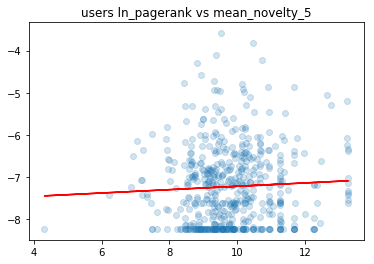

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.033727111448078065
intercept: -7.557830018500776
r: 0.04921261452847195
r-squared: 0.0024218814287279684
p: 0.25671849971429683
standard error: 0.029704955488105155


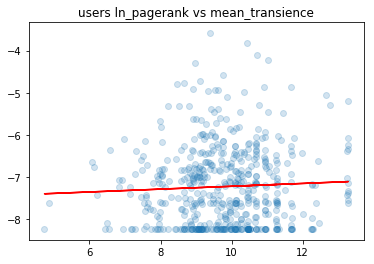

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.03488458601645993
intercept: -7.570272610448718
r: 0.04375923620155323
r-squared: 0.001914870752943327
p: 0.313276078080506
standard error: 0.03456211989666817


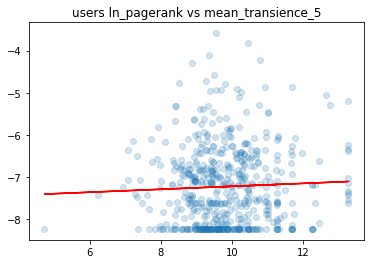

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.018509441437715483
intercept: -7.22800989137646
r: 0.021013570662078818
r-squared: 0.0004415701519701796
p: 0.6283500841453341
standard error: 0.038216445498245814


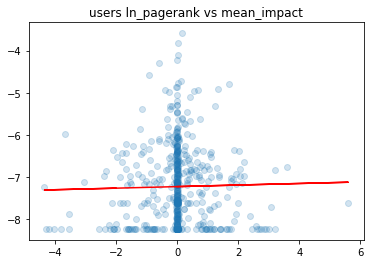

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.054389865565602054
intercept: -7.228390852366961
r: 0.026194757649340907
r-squared: 0.0006861653283077039
p: 0.5462182248008416
standard error: 0.09007562620659994


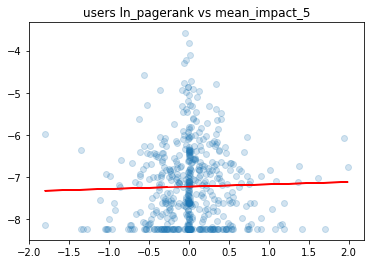

In [66]:
user_scatter('ln_num_posts', 'ln_pagerank')
user_scatter('ln_mean_score_submissions', 'ln_pagerank')
user_scatter('ln_mean_length_submissions', 'ln_pagerank')
user_scatter('mean_novelty', 'ln_pagerank')
user_scatter('mean_novelty_5', 'ln_pagerank')
user_scatter('mean_transience', 'ln_pagerank')
user_scatter('mean_transience_5', 'ln_pagerank')
user_scatter('mean_impact', 'ln_pagerank')
user_scatter('mean_impact_5', 'ln_pagerank')

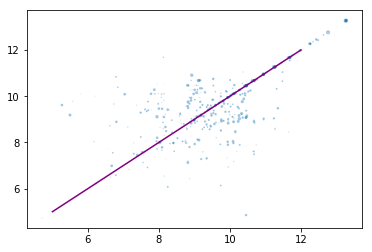

In [67]:
# novelty-transcience plot
plt.scatter(x=users['mean_novelty'], y=users['mean_transience'], s=users['mean_score_submissions'] / 100, alpha=0.3)

# add line of equality
domain = np.arange(5, 13)
plt.plot(domain, domain, color='purple')

plt.show()

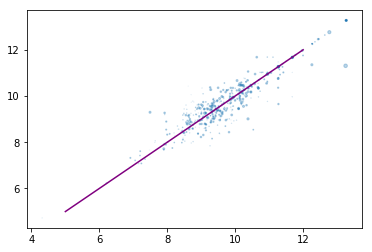

In [68]:
# novelty-transcience plot
plt.scatter(x=users['mean_novelty_5'], y=users['mean_transience_5'], s=users['mean_score_submissions'] / 100, alpha=0.3)

# add line of equality
domain = np.arange(5, 13)
plt.plot(domain, domain, color='purple')

plt.show()